# Machine Learning Lab
### Laura Elliott

In [631]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import datetime
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Part I 

In [632]:
orders = pd.read_csv('orders.csv', index_col=0)

orders.head()

orders.columns


Index(['Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode', 'Customer.ID',
       'Customer.Name', 'Segment', 'Postal.Code', 'City', 'State', 'Country',
       'Region', 'Market', 'Product.ID', 'Category', 'Sub.Category',
       'Product.Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping.Cost', 'Order.Priority'],
      dtype='object')

In [633]:
orders.Country.unique()

array(['United States', 'Australia', 'Germany', 'Senegal', 'New Zealand',
       'Afghanistan', 'Saudi Arabia', 'Brazil', 'China', 'France',
       'Italy', 'Tanzania', 'Poland', 'United Kingdom', 'Mexico',
       'El Salvador', 'Taiwan', 'India', 'Dominican Republic',
       'Democratic Republic of the Congo', 'Indonesia', 'Uruguay', 'Iran',
       'Mozambique', 'Bangladesh', 'Spain', 'Ukraine', 'Nicaragua',
       'Morocco', 'Philippines', 'Austria', 'Colombia', 'Netherlands',
       'Malaysia', 'Ecuador', 'Thailand', 'Somalia', 'Guatemala',
       'Belarus', 'Cambodia', 'South Africa', 'Canada', 'Japan', 'Russia',
       'Egypt', 'Azerbaijan', 'Lithuania', 'Argentina', 'Lesotho',
       'Vietnam', 'Cuba', 'Romania', 'Turkey', 'Cameroon', 'Hungary',
       'Singapore', 'Angola', 'Belgium', 'Pakistan', 'Finland', 'Ghana',
       'Zambia', 'Iraq', 'Liberia', 'Georgia', 'Switzerland', 'Albania',
       'Chad', 'Montenegro', 'Namibia', 'Portugal', 'Madagascar',
       'Sweden', 'Myanmar 

### Problem 1: Dataset Import & Cleaning
Check **"Profit"** and **"Sales"** in the dataset, convert these two columns to numeric type. 

In [634]:
########### Eliminate '$', '.', & ',' from profit to switch to numeric

orders['Profit'] = orders['Profit'].str.replace('$','')
orders['Profit'] = orders['Profit'].str.replace('.', '')
orders['Profit'] = orders['Profit'].str.replace(',', '')

########### Eliminate '$', '.', & ',' from Sales to switch to numeric

orders['Sales'] = orders['Sales'].str.replace('$','')
orders['Sales'] = orders['Sales'].str.replace('.', '')
orders['Sales'] = orders['Sales'].str.replace(',', '')



########## Switch Profit, Orders to numeric value
orders['Profit'] = pd.to_numeric(orders['Profit'])
orders['Sales'] = pd.to_numeric(orders['Sales'])


######### Creating month variable #########
orders['Month'] = pd.DatetimeIndex(orders['Order.Date']).month

####### Creating a Seasons Variable##########

seasons = [1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1] # Season Values

month_to_season = dict(zip(range(1,13), seasons)) ### compress the months into the different seasons
month_to_season 
 # 1 = Winter 
 # 2 = Spring 
 # 3 = Summer
 # 4 = Fall

orders['Season'] = orders.Month.map(month_to_season) 



### Problem 2: Inventory Management
- Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year's inventory.
- He wants you to answer the following questions:
    1. Is there any seasonal trend of inventory in the company?
    2. Is the seasonal trend the same for different categories?

- ***Hint:*** For each order, it has an attribute called `Quantity` that indicates the number of product in the order. If an order contains more than one product, there will be multiple observations of the same order.

### 2. 1 Seasonal Trend in Quantity


###  Visualization of our Outcome 'Quantity' by 'Season'

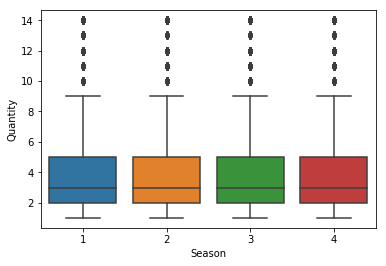

In [635]:
sns.boxplot(x=orders["Season"], y=orders["Quantity"])

###  ANOVA

In [636]:
### ONE WAY ANOVA comparing quantity means in the different seasons

x = [1 , 2, 3, 4] 
season_dict = {}
for season in x:
    season_dict[season] = orders[orders['Season'] == season]['Quantity']
    
stats.f_oneway(
             season_dict[1], season_dict[2], \
             season_dict[3], season_dict[4]
)

F_onewayResult(statistic=2.975870788020286, pvalue=0.030278437549823706)

### Answer: There seems to be a seasonal trend in quantity sold, based on the ANOVA

## 2.2 Seasonal trend in Category

In [639]:
orders.Category.value_counts()

Office Supplies    31289
Technology         10141
Furniture           9860
Name: Category, dtype: int64

### ANOVA

In [643]:
x = [1 , 2,  3] 
cat_dict = {}
for category in x:
    cat_dict[category] = orders[orders['Category'] == category]['Quantity']
    
stats.f_oneway(
             cat_dict[1], cat_dict[2], \
             cat_dict[3]
)

F_onewayResult(statistic=nan, pvalue=nan)

### 2.Answer based on analysis

There was a significant F test for Quantity during each season, Need to see why my category test is not working.

### Problem 3: Why did customers make returns?
- Your manager required you to give a brief report (**Plots + Interpretations**) on returned orders.

	1. How much profit did we lose due to returns each year?


	2. How many customer returned more than once? more than 5 times?


	3. Which regions are more likely to return orders?


	4. Which categories (sub-categories) of products are more likely to be returned?

- ***Hint:*** Merge the **Returns** dataframe with the **Orders** dataframe using `Order.ID`.


In [443]:
returns = pd.read_csv('Returns.csv', index_col=0)
orders = pd.read_csv('Orders.csv', index_col=0 )

In [444]:
returns.head()

,Order ID,Region
Returned,,
Yes,CA-2012-SA20830140-41210,Central US
Yes,IN-2012-PB19210127-41259,Eastern Asia
Yes,CA-2012-SC20095140-41174,Central US
Yes,IN-2015-JH158207-42140,Oceania
Yes,IN-2014-LC168857-41747,Oceania


In [445]:
orders.head()
orders.columns

Index(['Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode', 'Customer.ID',
       'Customer.Name', 'Segment', 'Postal.Code', 'City', 'State', 'Country',
       'Region', 'Market', 'Product.ID', 'Category', 'Sub.Category',
       'Product.Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping.Cost', 'Order.Priority'],
      dtype='object')

In [446]:
returns['Order.ID'] = returns['Order ID']
returns['Returned'] = returns.index


returns = returns.drop('Order ID', axis = 1)
returns.head()

,Region,Order.ID,Returned
Returned,,,
Yes,Central US,CA-2012-SA20830140-41210,Yes
Yes,Eastern Asia,IN-2012-PB19210127-41259,Yes
Yes,Central US,CA-2012-SC20095140-41174,Yes
Yes,Oceania,IN-2015-JH158207-42140,Yes
Yes,Oceania,IN-2014-LC168857-41747,Yes


In [447]:
orders_merged = pd.merge(returns, orders, how = 'outer', on='Order.ID')

orders_merged.head()

,Region_x,Order.ID,Returned,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,Central US,CA-2012-SA20830140-41210,Yes,10/28/12,10/30/12,First Class,SA-208301402,Sue Ann Reed,Consumer,60610.0,...,TEC-PH-3138,Technology,Phones,Apple iPhone 5S,"$2,735.95",6,0.2,$341.99,752.51,High
1,Eastern Asia,IN-2012-PB19210127-41259,Yes,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,...,FUR-TA-5060,Furniture,Tables,"Lesro Conference Table, with Bottom Storage","$1,715.16",2,0.0,$720.36,725.57,Critical
2,Eastern Asia,IN-2012-PB19210127-41259,Yes,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,...,FUR-BO-5762,Furniture,Bookcases,"Safco Classic Bookcase, Pine","$2,197.50",5,0.0,$153.75,627.27,Critical
3,Eastern Asia,IN-2012-PB19210127-41259,Yes,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,...,FUR-TA-5065,Furniture,Tables,"Lesro Round Table, with Bottom Storage","$1,356.03",3,0.0,$311.85,458.97,Critical
4,Eastern Asia,IN-2012-PB19210127-41259,Yes,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,...,FUR-CH-5454,Furniture,Chairs,"Office Star Swivel Stool, Adjustable",$882.15,5,0.0,$114.60,203.92,Critical


In [448]:
orders_merged.Returned.unique()

array(['Yes', nan], dtype=object)

In [449]:
impute_none = orders_merged.loc[:, ['Returned']]
for i in impute_none.columns:
    orders_merged[i].fillna('No', inplace = True)
    
orders_merged.Returned.unique()

array(['Yes', 'No'], dtype=object)

In [664]:
orders_merged['Profit'] = orders_merged['Profit'].str.replace('$','')
orders_merged['Profit'] = orders_merged['Profit'].str.replace('.', '')
orders_merged['Profit'] = orders_merged['Profit'].str.replace(',', '')

orders_merged['Profit'] = pd.to_numeric(orders_merged['Profit'])


AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [451]:
orders_merged['Sales'] = orders_merged['Sales'].str.replace('$','')
orders_merged['Sales'] = orders_merged['Sales'].str.replace('.', '')
orders_merged['Sales'] = orders_merged['Sales'].str.replace(',', '')

orders_merged['Sales'] = pd.to_numeric(orders_merged['Sales'])

In [452]:
orders_merged['Loss'] = [ row.Sales - row.Profit for index, row in orders_merged.iterrows() ]

In [453]:
orders_merged['Year'] = pd.DatetimeIndex(orders_merged['Order.Date']).year

orders_merged.head()

,Region_x,Order.ID,Returned,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Loss,Year
0,Central US,CA-2012-SA20830140-41210,Yes,10/28/12,10/30/12,First Class,SA-208301402,Sue Ann Reed,Consumer,60610.0,...,Phones,Apple iPhone 5S,273595,6,0.2,34199,752.51,High,239396,2012
1,Eastern Asia,IN-2012-PB19210127-41259,Yes,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,...,Tables,"Lesro Conference Table, with Bottom Storage",171516,2,0.0,72036,725.57,Critical,99480,2012
2,Eastern Asia,IN-2012-PB19210127-41259,Yes,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,...,Bookcases,"Safco Classic Bookcase, Pine",219750,5,0.0,15375,627.27,Critical,204375,2012
3,Eastern Asia,IN-2012-PB19210127-41259,Yes,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,...,Tables,"Lesro Round Table, with Bottom Storage",135603,3,0.0,31185,458.97,Critical,104418,2012
4,Eastern Asia,IN-2012-PB19210127-41259,Yes,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,...,Chairs,"Office Star Swivel Stool, Adjustable",88215,5,0.0,11460,203.92,Critical,76755,2012


### 3.1 How much Profit is lost per Year

In [454]:
print('Profit:', orders_merged.Profit.describe())
print('Loss:', orders_merged.Loss.describe())

Profit: count     51290.000000
mean       2861.097036
std       17434.106592
min     -659998.000000
25%           0.000000
50%         924.000000
75%        3681.000000
max      839998.000000
Name: Profit, dtype: float64
Loss: count    5.129000e+04
mean     2.178797e+04
std      4.309016e+04
min      5.500000e+01
25%      2.688000e+03
50%      7.363500e+03
75%      2.229650e+04
max      2.444956e+06
Name: Loss, dtype: float64


In [458]:
thresholdhigh = 500000
thresholdlow = 55
orders_merged = orders_merged[orders_merged.loc[:,'Loss'] < thresholdhigh]
orders_merged = orders_merged[orders_merged.loc[:,'Loss'] > thresholdlow]


In [459]:
thresholdhigh = 840000
thresholdlow = -70000
orders_merged = orders_merged[orders_merged.loc[:,'Loss'] < thresholdhigh]
orders_merged = orders_merged[orders_merged.loc[:,'Loss'] > thresholdlow]

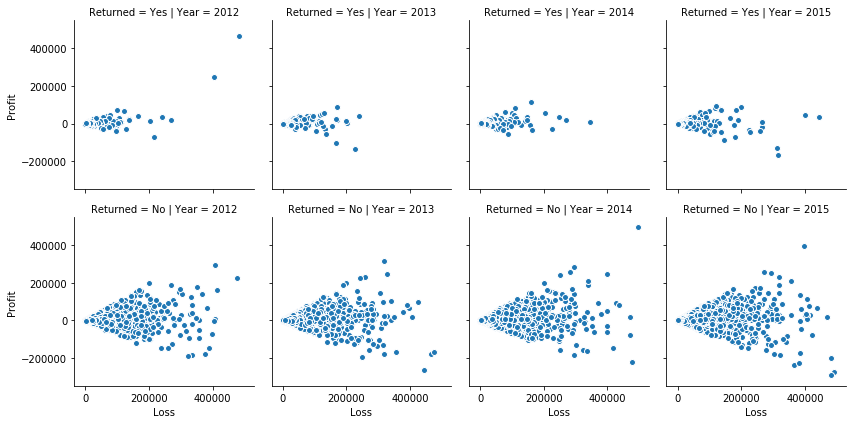

In [460]:
g = sns.FacetGrid(orders_merged, col="Year",  row="Returned")
g = g.map(plt.scatter, "Loss", "Profit", edgecolor="w")

In [379]:
loss = pd.DataFrame(orders_merged.groupby(["Year", 'Returned']).sum().sort_values("Profit", ascending=False))

In [380]:
loss

,,Postal.Code,Sales,Quantity,Discount,Profit,Shipping.Cost,Loss
Year,Returned,,,,,,,
2015-01-01,No,178651790.0,411618369,58008,2401.052,48705313,441114.47654,362913056
2014-01-01,No,132535324.0,327201062,46040,1853.808,38942426,350100.31836,288258636
2013-01-01,No,106182766.0,258086470,36603,1481.914,29814544,273453.15200,228271926
2012-01-01,No,107758470.0,214751583,29986,1266.426,23146309,232575.16050,191605274
2014-01-01,Yes,7994617.0,13373741,2096,81.714,1751063,15856.42600,11622678
2012-01-01,Yes,5512777.0,11193581,1457,66.968,1747726,12636.18500,9445855
2015-01-01,Yes,7911427.0,18368398,2614,110.986,1711297,21212.31300,16657101
2013-01-01,Yes,5025481.0,9657521,1508,66.860,926989,11137.67200,8730532


## Answer:
    In 2015, the total profit lost from returned orders was 16,657,101.
    In 2014, the total profit lost due to returned orders was 11,622,678.
    In 2013, the total profit lost due to returned orders was 8,730,532
    In 2012, the total profit lost due to returned orders was 9,445,855



### 3.2  How many customers returned more than once? more than 5 times?

In [490]:
orders_merged['Counts'] = orders_merged.groupby(['Customer.ID'])['Returned'].transform('count')


,Region_x,Order.ID,Returned,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,...,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Loss,Year,Counts
0,Central US,CA-2012-SA20830140-41210,Yes,10/28/12,10/30/12,First Class,SA-208301402,Sue Ann Reed,Consumer,60610.0,...,Apple iPhone 5S,273595,6,0.2,34199,752.51,High,239396,2012,2
1,Eastern Asia,IN-2012-PB19210127-41259,Yes,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,...,"Lesro Conference Table, with Bottom Storage",171516,2,0.0,72036,725.57,Critical,99480,2012,8
2,Eastern Asia,IN-2012-PB19210127-41259,Yes,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,...,"Safco Classic Bookcase, Pine",219750,5,0.0,15375,627.27,Critical,204375,2012,8
3,Eastern Asia,IN-2012-PB19210127-41259,Yes,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,...,"Lesro Round Table, with Bottom Storage",135603,3,0.0,31185,458.97,Critical,104418,2012,8
4,Eastern Asia,IN-2012-PB19210127-41259,Yes,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,...,"Office Star Swivel Stool, Adjustable",88215,5,0.0,11460,203.92,Critical,76755,2012,8


In [521]:
return_most = orders_merged[orders_merged.Counts < 5]

return_most = pd.DataFrame(return_most.groupby(["Customer.ID"]).sum().sort_values("Counts", ascending=True))
print(return_most.Counts.sum())
return_most.Counts.value_counts()


70658


1     6068
4     3758
9     2550
16    1663
Name: Counts, dtype: int64

## Answer:  

There were a total of 14,039 returns in the dataset. 6,068 customers made only one return while 7,971 made more then one return. There were a total of 4,213 customers that made more then 5 returns.

### 3.3 Which regions are more likely to return orders?

In [648]:
orders_merged.Region_x.unique()
orders_merged.dtypes

Region_x            object
Order.ID            object
Returned          category
Order.Date          object
Ship.Date           object
Ship.Mode           object
Customer.ID         object
Customer.Name       object
Segment             object
Postal.Code        float64
City                object
State               object
Country             object
Region_y            object
Market              object
Product.ID          object
Category            object
Sub.Category        object
Product.Name        object
Sales                int64
Quantity             int64
Discount           float64
Profit               int64
Shipping.Cost      float64
Order.Priority      object
Loss                 int64
Year                 int64
Counts               int64
Prod.Counts          int64
dtype: object

In [660]:
orders_merged['Region_x'].astype('category')

regions = orders_merged.groupby("Region_x")['Counts'].describe()

regions

,count,mean,std,min,25%,50%,75%,max
Region_x,,,,,,,,
Caribbean,69.0,26.695652,12.216556,6.0,18.00,22.0,36.00,70.0
Central Africa,17.0,29.588235,11.800735,9.0,22.00,30.0,38.00,52.0
Central America,248.0,25.217742,12.085432,1.0,17.75,22.0,32.25,80.0
Central Asia,9.0,32.888889,10.227957,22.0,23.00,30.0,39.00,49.0
Central US,71.0,12.943662,36.805235,2.0,5.00,6.0,8.00,227.0
Eastern Africa,18.0,32.222222,20.440892,10.0,17.00,25.5,41.75,84.0
Eastern Asia,131.0,27.305344,14.362287,3.0,17.00,25.0,35.50,92.0
Eastern Canada,10.0,35.000000,19.419349,13.0,23.50,33.0,39.25,84.0
Eastern Europe,42.0,26.476190,10.169870,6.0,20.00,23.5,33.75,49.0


## Answer:
There are differences between region and return counts, with Central America returning the most

## 3.4 Which Sub categories more likely to be returned

In [663]:
sub = orders_merged.groupby("Sub.Category")['Counts'].describe()

sub

,count,mean,std,min,25%,50%,75%,max
Sub.Category,,,,,,,,
Accessories,3074.0,17.524398,8.363890,1.0,12.0,18.0,22.0,40.0
Appliances,1741.0,10.361287,4.002998,1.0,7.0,10.0,13.0,20.0
Art,4864.0,32.388569,15.058824,1.0,28.0,34.0,39.0,80.0
Binders,6145.0,33.888853,18.178195,2.0,22.0,36.0,43.0,92.0
Bookcases,2411.0,19.007466,7.467103,1.0,15.0,19.0,22.0,44.0
Chairs,3431.0,22.727193,9.425922,1.0,18.0,23.0,28.0,48.0
Copiers,2218.0,19.773670,7.016071,2.0,16.0,19.0,22.0,45.0
Envelopes,2387.0,18.889401,6.863133,1.0,15.0,18.0,22.0,45.0
Fasteners,2601.0,44.816225,57.943215,1.0,17.0,25.0,42.0,227.0


## Answer:

There is a difference in Sub Category and Return Counts, with Binders being returned the most

# Part II

### Problem 4: Feature Engineering
#### Step 1: Create the dependent variable
- First of all, we need to generate a categorical variable which indicates whether an order has been returned or not.
- ***Hint:*** the returned orders’ IDs are contained in the dataset “returns”

In [588]:
orders_merged.head()
orders_merged.Returned.value_counts()

No     49043
Yes     2220
Name: Returned, dtype: int64

This set was done in the previous set of problems

#### Step 2:

- If a product has been returned before, it may be returned again. 
- Let us generate a feature indictes how many times the product has been returned before.
- If it never got returned, we just impute using 0.
- ***Hint:*** Group by different Product.ID

In [598]:
orders_merged['Prod.Counts'] = orders_merged.groupby(['Product.ID'])['Returned'].transform('count')
orders_merged.columns

Index(['Region_x', 'Order.ID', 'Returned', 'Order.Date', 'Ship.Date',
       'Ship.Mode', 'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code',
       'City', 'State', 'Country', 'Region_y', 'Market', 'Product.ID',
       'Category', 'Sub.Category', 'Product.Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping.Cost', 'Order.Priority', 'Loss', 'Year',
       'Counts', 'Prod.Counts'],
      dtype='object')

### Problem 5: Fitting Models

- You can use any binary classification method you have learned so far.
- Use 80/20 training and test splits to build your model. 
- Double check the column types before you fit the model.
- Only include useful features. i.e all the `ID`s should be excluded from your training set.
- Note that there are only less than 5% of the orders have been returned, so you should consider using the [createDataPartition](https://www.rdocumentation.org/packages/caret/versions/6.0-80/topics/createDataPartition) function from `caret` package and [StratifiedKfold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn-model-selection-stratifiedkfold) from sklearn when running cross-validation.
- Do forget to `set.seed()` before the spilt to make your result reproducible.
- **Note:** We are not looking for the best tuned model in the lab so don't spend too much time on grid search. Focus on model evaluation and the business use case of each model.


In [618]:
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
logit_1 = linear_model.LogisticRegression(C=1e4)
np.random.seed(1)


X = orders_merged.drop(['Returned','Order.ID', 'Customer.ID', 'Product.ID'], axis=1)
y = orders_merged['Returned']


    

In [627]:
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X, y)

print(skf)  
StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    


StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [ 1110  1111  1112 ... 51260 51261 51262] TEST: [    0     1     2 ... 26739 26740 26741]
TRAIN: [    0     1     2 ... 26739 26740 26741] TEST: [ 1110  1111  1112 ... 51260 51261 51262]


## Logistic Regression

In [672]:
logit_1.fit(X_train, y_train)
print('Score:' ,logit_1.score(X_train, y_train))

# Coefficients 
print(logit_1.coef_)

## Intercept
print(logit_1.intercept_)

Score: 0.9561570348695441
[[ 9.67742356e-07 -1.07970263e-06 -1.52089437e-03 -2.12657871e-08
  -9.65442286e-08 -1.29729305e-07 -4.69549302e-09 -2.28643083e-08
   5.83223364e-10 -5.03237016e-08 -7.18159173e-08 -5.42949095e-08
  -4.96330827e-08 -1.02662179e-08 -7.16251320e-08 -1.51131949e-08
  -7.24777044e-08 -4.76282707e-08  1.44431903e-09]]
[-7.55235626e-07]


/Users/lauraelliott/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [671]:
import statsmodels.api as sm

X_add_const = sm.add_constant(X_train)
logit = sm.Logit(y_train, X_add_const)
ans = logit.fit()
print(ans.summary())

/Users/lauraelliott/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

### Problem 6: Evaluating Models
- What is the best metric to evaluate your model. Is accuracy good for this case?
- Now you have multiple models, which one would you pick? 
- Can you get any clue from the confusion matrix? What is the meaning of precision and recall in this case? Which one do you care the most? How will your model help the manager make decisions?
- **Note:** The last question is open-ended. Your answer could be completely different depending on your understanding of this business problem.


I am getting warnings for my models and am still trouble shooting. If I did have the model summary I would check it's F statistic, Adj R^2 value, and the pvalues

### Problem 7: Feature Engineering Revisit
- Is there anything wrong with the new feature we generated? How should we fix it?
- ***Hint***: For the real test set, we do not know it will get returned or not.

In [677]:
print(orders_merged.Returned.value_counts())
2220/49043

No     49043
Yes     2220
Name: Returned, dtype: int64


0.04526639887445711

There is a very small percentage of returns (4.5%) in the data, so it is not garaunteed that 'yes' returns would be in the test (20%) dataset.